# Project: Investigate a TMDb movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>**About the data set** :The data set contains information about 10,000 movies collected from The Movie Database (TMDb), contains information some of them we will need it in our analysis and some are not, depends on what questions I want to find answers to.
>
> **Questions we want to answer** : 
><ol>
><li><a href="#q1">$\color{black}{\text{What is the average runtime to 4 genres?}}$</a></li>
><li><a href="#q2">$\color{black}{\text{What is the top 3 movies that have the most revenue?}}$</a></li>
><li><a href="#q3">$\color{black}{\text{What is the top 3 rating movies?}}$</a></li>
><li><a href="#q4">$\color{black}{\text{What is the relationship between genre and popularity for movies?}}$</a></li>
></ol>



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Oh well! we find some interesting information we can use to answer our questions but before we do so, I think some information will not help to answer our questions so in the next step I will remove them(drop them)

### Drop the columns that we don't need 

In [5]:
#Columns that i will drop 
#imdb_id ,cast,homepage ,director ,tagline, keywords,overview,production_companies,release_date,release_year,budget_adj,revenue_adj
df.drop(['imdb_id' ,'cast','homepage' ,'director' ,'tagline', 'keywords','overview','production_companies','release_date','release_year','budget_adj','revenue_adj']
,axis=1,inplace=True)

In [6]:
#Cheking the data
df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1


>**Note: removing the columns that I chose doesn't mean that they are not useful but in my analysis, they just don't answer my questions**
>
>**some interesting information we can use in another analysis**
><ol>
><li>using the cast column to ask who is more in specific genre males or females
><li> which production company has more movies
></ol>
>
>    and alot more ..

In [7]:
#now i will set the index to the id column and check it
df.set_index('id',inplace=True)
df.head(2)

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average
id,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5
76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1


So yes it works.
>**But** how about the missing data and is there any duplicated data?
>
>In the next two steps I will check for missing data and duplicated 

In [8]:
#checking the duplicated rows
sum(df.duplicated())

1

We are lucky here ,we found one duplicated 
next we will drop that duplicated

In [9]:
#drop duplicated data and check if it works
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

It works.
>Next step we will look for missing data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 135397 to 22293
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   genres          10842 non-null  object 
 6   vote_count      10865 non-null  int64  
 7   vote_average    10865 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 763.9+ KB


We found 14 missing value in genres column <br> <b>but here we can't use the mean to fill missing value since  genres column is not a numeric value so it is okay to drop them <b/>

In [11]:
#drop the missing value then check 
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 135397 to 22293
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10842 non-null  float64
 1   budget          10842 non-null  int64  
 2   revenue         10842 non-null  int64  
 3   original_title  10842 non-null  object 
 4   runtime         10842 non-null  int64  
 5   genres          10842 non-null  object 
 6   vote_count      10842 non-null  int64  
 7   vote_average    10842 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 762.3+ KB


**Last thing to do with cleaning our data** 
>If you notice , the genres column has multiple values in some rows so we need to handle this issue
>
>luckily  , I found a solution for that issue in <a href="https://books.google.jo/books/about/Python_for_Data_Analysis.html?id=JtJAkfzds4wC&printsec=frontcover&source=kp_read_button&hl=en&redir_esc=y&fbclid=IwAR1WSgNKW0VTb-YykWF5wOOXyp1-4Eq-2q0kzOLdPAf6cl69VrnUUwWQWsg#v=onepage&q&f=false">Python for data analysis book page 202 - 203</a>
>
>So let's get started

In [12]:
#here we will separate the genres by |
genre_iter = (set(x.split('|')) for x in df.genres)

In [13]:
#make a list of all genres
genres = sorted(set.union(*genre_iter))

In [14]:
genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [15]:
dummies = pd.DataFrame(np.zeros((len(df), len(genres))), columns=genres)

In [16]:
dummies

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#iterate over movies and set 1 for each movie satisfy specific genre or multiple genres
for i, gen in enumerate(df.genres):
    dummies.loc[i, gen.split('|')] = 1

In [18]:
dummies

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10838,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10839,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10840,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average
id,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5
76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1
262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5
168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3


I want to merge df with dummies but before that, I decided to remove the id column from df so it becomes 0,1,2...etc like in dummies so I merge using the index since it is unique

In [20]:
df.reset_index(drop=True, inplace=True)
df

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3
...,...,...,...,...,...,...,...,...
10837,0.080598,0,0,The Endless Summer,95,Documentary,11,7.4
10838,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,20,5.7
10839,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,11,6.5
10840,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,22,5.4


Let's merge them now

In [21]:
movies=df.merge(dummies, how='inner', on=df.index)

In [22]:
movies.head()

,key_0,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We are almost done all we have to do now is renaming the key_0 column to id and set it as an index 
<br>
And finally changing the data type of the new columns that we merged from float to int


In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10841
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key_0            10842 non-null  int64  
 1   popularity       10842 non-null  float64
 2   budget           10842 non-null  int64  
 3   revenue          10842 non-null  int64  
 4   original_title   10842 non-null  object 
 5   runtime          10842 non-null  int64  
 6   genres           10842 non-null  object 
 7   vote_count       10842 non-null  int64  
 8   vote_average     10842 non-null  float64
 9   Action           10842 non-null  float64
 10  Adventure        10842 non-null  float64
 11  Animation        10842 non-null  float64
 12  Comedy           10842 non-null  float64
 13  Crime            10842 non-null  float64
 14  Documentary      10842 non-null  float64
 15  Drama            10842 non-null  float64
 16  Family           10842 non-null  float64
 17  Fantasy     

In [24]:
#change the types for the mentioned columns
arr=movies.columns[9:]
movies[arr] = movies[arr].astype(int)


In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10841
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key_0            10842 non-null  int64  
 1   popularity       10842 non-null  float64
 2   budget           10842 non-null  int64  
 3   revenue          10842 non-null  int64  
 4   original_title   10842 non-null  object 
 5   runtime          10842 non-null  int64  
 6   genres           10842 non-null  object 
 7   vote_count       10842 non-null  int64  
 8   vote_average     10842 non-null  float64
 9   Action           10842 non-null  int32  
 10  Adventure        10842 non-null  int32  
 11  Animation        10842 non-null  int32  
 12  Comedy           10842 non-null  int32  
 13  Crime            10842 non-null  int32  
 14  Documentary      10842 non-null  int32  
 15  Drama            10842 non-null  int32  
 16  Family           10842 non-null  int32  
 17  Fantasy     

And now put the key_0 as index and rename it to id

In [26]:
#rename key_0 to id
movies.rename(columns={'key_0':'id'} ,inplace=True)

In [27]:
#set key_0 as index
movies.set_index('id',inplace=True)
movies.head(2)

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,1,1,...,0,0,0,0,0,1,0,1,0,0
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,1,1,...,0,0,0,0,0,1,0,1,0,0


**Note:** I kept the genres column as a reference but we can delete it

Now since everything is clean and fine let's start exploring our data

<a id='eda'></a>
## Exploratory Data Analysis


In [385]:
import random

def draw_bar(labels,values,title,xlabel,ylabel,xsize,ysize):
    """function to draw a bar with random colors and some customize options

    Parameters:
    labels (arr): array of x-axis values
    values (arr): array of y-axis values
    title  (str): string represent the title of the plot
    xlabel (str): string represent the title of the x-axis
    ylabel (str): string represent the title of the y-axis
    xsize  (int): intger represent the width of the plot
    xsize  (int): intger represent the hight of the plot
    
   """
    sns.set_style('darkgrid')
    plt.subplots(figsize=(xsize,ysize))
    bar = plt.bar(labels,values);
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    my_colors = 'rmgbkyc' 
    for i in range(0,len(labels)):
        color=str(round(random.random(), 2))
        bar[i].set_color(color)


<a id='q1'></a>
### What is the average runtime to 4 genres?

In [28]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,...,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,0.219886,0.135676,0.064471,0.349843,...,0.030806,0.150987,0.037631,0.074709,0.157904,0.113355,0.015403,0.268124,0.024903,0.015219
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,0.414188,0.342460,0.245602,0.476942,...,0.172800,0.358053,0.190312,0.262934,0.364668,0.317041,0.123155,0.443003,0.155837,0.122427
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
#here we finding the mean of the runtime for each genre
romance= movies.query('Romance == 1')['runtime'].mean()
comedy= movies.query('Comedy == 1')['runtime'].mean()
animation= movies.query('Animation == 1')['runtime'].mean()
horror= movies.query('Horror == 1')['runtime'].mean()

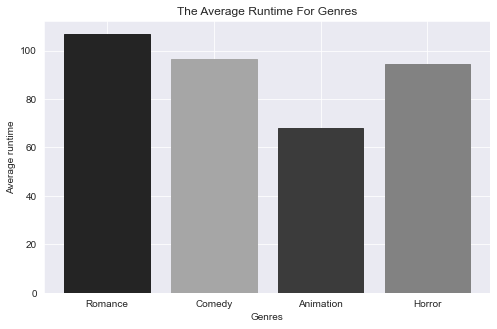

In [404]:
#Plot the Average Runtime For Genres
labels= ['Romance','Comedy','Animation','Horror']
heights= [romance,comedy,animation,horror]
draw_bar(labels,heights,'The Average Runtime For Genres','Genres','Average runtime',8,5)

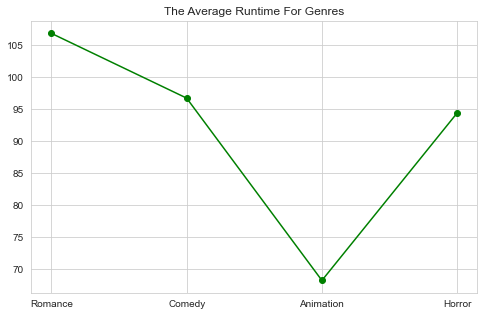

In [163]:
#another way to represent our result in case some confusion pop up between Comedy and Horror related to The Average Runtime
sns.set_style("whitegrid")
plt.subplots(figsize=(8,5))
plt.plot(labels,[romance,comedy,animation,horror],marker='o' ,color='green')
plt.title('The Average Runtime For Genres');

#### What is the average runtime to 4 genres?
**Romance**
<br>
106.89135514018692
<br>
**Comedy**
<br>
96.7450566833641
<br>
**Horror**
<br>
94.42455711667685
<br>
**Animation**  
<br>
68.18168812589414

>**Note** : we can get this data by simply type any of those horror,romance, comedy, animation as in the cell below

In [409]:
horror

94.42455711667685

**So as we can see the average runtime for Romance is the most and for Animation is the least**

<a id='q2'></a>
### What is the top 3 movies that have the most revenue?

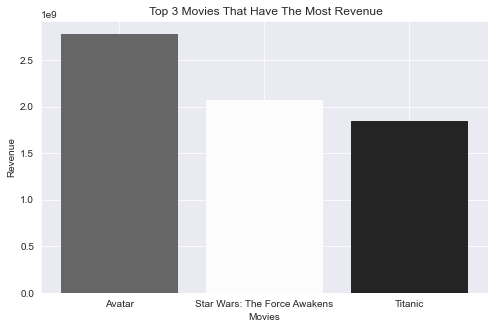

In [445]:
#sort the rows descending by revenue so we get the top 3 names using head(3) and same thing to get the top 3 revenue
topn3 = movies.sort_values(by='revenue', ascending=False).head(3)['original_title']
topn3
topr3 = movies.sort_values(by='revenue', ascending=False).head(3)['revenue']
topr3
#plot the Top 3 Movies That Have The Most Revenue
draw_bar(topn3,topr3,' Top 3 Movies That Have The Most Revenue','Movies','Revenue',8,5)

#### What is the top 3 movies that have the most revenue?

##### Top 3 Movies That Have The Most Revenue
<ol>
    <pre>
    <li>Avatar                      | 2781505847 dollar
    <li>Star Wars: The Force Awakens| 2068178225 dollar
    <li>Titanic                     | 1845034188 dollar
    </pre>

</ol>

<a id='q3'></a>
### What is the top 3 rating movies?

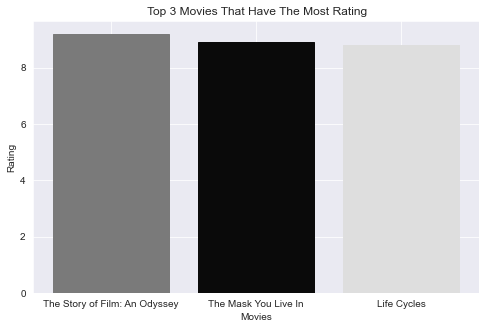

In [442]:
#sort the rows descending by vote_average so we get the top 3 names using head(3) and same thing to get the top 3 vote_average(rating)
topn3ra = movies.sort_values(by='vote_average', ascending=False).head(3)['original_title']
topn3ra
top3r=movies.sort_values(by='vote_average', ascending=False).head(3)['vote_average']
top3r
#plot the Top 3 Movies That Have The Most Rating
draw_bar(topn3ra,top3r,' Top 3 Movies That Have The Most Rating','Movies','Rating',8,5)

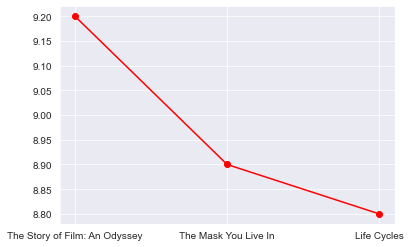

In [443]:
#another way of representation
plt.plot(topn3ra,top3r,marker='o',color='r');

#### What is the top 3 rating movies?

##### Top 3 Movies That Have The Most Rating

 <ol>
    <pre>
    <li>The Story of Film: An Odyssey| 9.2
    <li>The Mask You Live            | 8.9
    <li>Life Cycles                  | 8.8
    </pre>

</ol>

<a id='q4'></a>

### What is the relationship between genre and popularity for movies?

In [334]:
#add _ to the Science Fiction and TV Movie columns because python found _ easier than space using rename()
movies.rename(columns={'Science Fiction':'Science_Fiction','TV Movie':'TV_Movie'} ,inplace=True) 
genres[15]='Science_Fiction'
genres[16]='TV_Movie'

In [341]:
mean_g=list()

In [342]:
#find the popularity mean for each genre
for x in range(0,len(genres)):
    mean_g.append(movies.query('{} == 1'.format(genres[x]))['popularity'].mean())


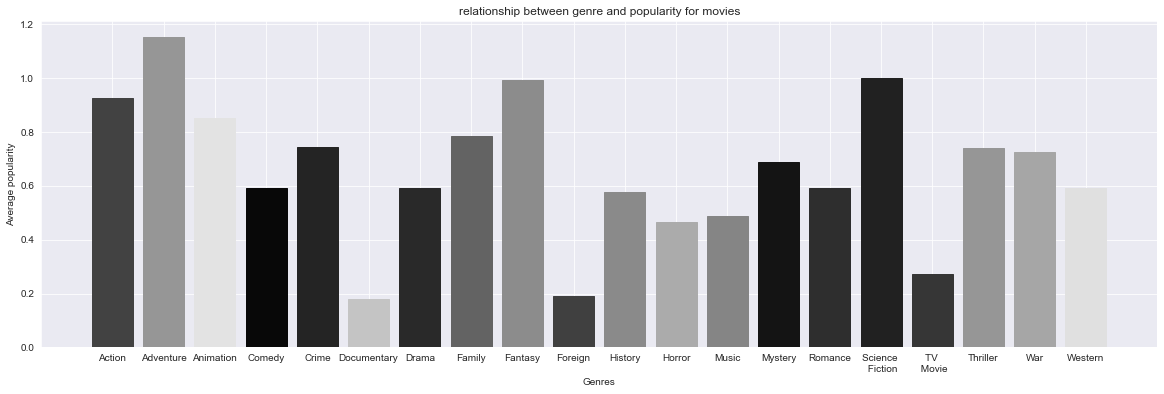

In [446]:
#here I faced a problem with Science Fiction and TV Movie when I made the plot so I made a copy of genres and modified them so each word come on a line
gen=genres.copy()
gen[15]='Science \n Fiction'
gen[16]='TV \n Movie'
#plot the Genres with there popularity
draw_bar(gen,mean_g,'relationship between genre and popularity for movies','Genres','Average popularity',20,6)

##### What is the relationship between genre and popularity for movies?

##### As we can see in the plot "relationship between genre and popularity for movies" with some genres the popularity increase and others it decreases.

##### Here is a list of genre that the popularity increase in clearly**
<ol>
<li>Adventure
<li>Fantasy
<li>Science Fiction
<li>Action
</ol>

##### Here is a list of genre that the popularity decreases in clearly
<ol>
<li>Foreign
<li>Documentary
<li>TV Movie
</ol>

<a id='conclusions'></a>
## Conclusions


##### This analysis on the dataset provided based on merging genres in one row so that put a limitation when it comes to use groupby() beside that this would cause some inaccurate result or biased.

##### There are some movies that have 0 budget and 0 revenue values which looks confusing any way I included them in my analysis, removing them might give new analysis results

##### Some columns look very interesting in the dataset but i decided to not using them in this analysis but of Course using them would give us a border analysis like the gender in the cast column and the production companies with the most movies